In [1]:
import numpy as np
import colorsys
import random
random.seed(1)

nb_classes = 91

In [2]:
from typing import Iterable, Tuple
import colorsys
import itertools
from fractions import Fraction

def zenos_dichotomy() -> Iterable[Fraction]:
    """
    http://en.wikipedia.org/wiki/1/2_%2B_1/4_%2B_1/8_%2B_1/16_%2B_%C2%B7_%C2%B7_%C2%B7
    """
    for k in itertools.count():
        yield Fraction(1,2**k)

def fracs() -> Iterable[Fraction]:
    """
    [Fraction(0, 1), Fraction(1, 2), Fraction(1, 4), Fraction(3, 4), Fraction(1, 8), Fraction(3, 8), Fraction(5, 8), Fraction(7, 8), Fraction(1, 16), Fraction(3, 16), ...]
    [0.0, 0.5, 0.25, 0.75, 0.125, 0.375, 0.625, 0.875, 0.0625, 0.1875, ...]
    """
    yield Fraction(0)
    for k in zenos_dichotomy():
        i = k.denominator # [1,2,4,8,16,...]
        for j in range(1,i,2):
            yield Fraction(j,i)

# can be used for the v in hsv to map linear values 0..1 to something that looks equidistant
# bias = lambda x: (math.sqrt(x/3)/Fraction(2,3)+Fraction(1,3))/Fraction(6,5)

HSVTuple = Tuple[Fraction, Fraction, Fraction]
RGBTuple = Tuple[float, float, float]

def hue_to_tones(h: Fraction) -> Iterable[HSVTuple]:
    for s in [Fraction(6,10)]: # optionally use range
        # default :  for v in [Fraction(8,10),Fraction(5,10)]: # could use range too
        for v in [Fraction(8,10),Fraction(5,10)]: # could use range too
            yield (h, s, v * 1.5) # use bias for v here if you use range

def hsv_to_rgb(x: HSVTuple) -> RGBTuple:
    return colorsys.hsv_to_rgb(*map(float, x))

flatten = itertools.chain.from_iterable

def hsvs() -> Iterable[HSVTuple]:
    return flatten(map(hue_to_tones, fracs()))

def rgbs() -> Iterable[RGBTuple]:
    return map(hsv_to_rgb, hsvs())

def rgb_to_css(x: RGBTuple) -> str:
    uint8tuple = map(lambda y: int(y*255), x)
    # return "rgb({},{},{})".format(*uint8tuple)
    return tuple(uint8tuple)

def css_colors() -> Iterable[str]:
    return map(rgb_to_css, rgbs())


sample_colors = list(itertools.islice(css_colors(), nb_classes))

In [3]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display # to display images

segmentation = random.sample(sample_colors[:21], 21)
object_detection = random.sample(sample_colors, len(sample_colors))[:91]

def display_colors(colors):
    font = ImageFont.truetype("../streamlit/fonts/Roboto-Bold.ttf", 18)
    for color in colors:
        im = Image.new('RGB', (1000, 100), color=color)
        draw = ImageDraw.Draw(im)
        draw.text((10, 25), f"display of color {color}", (0, 0, 0), font=font)
        display(im)


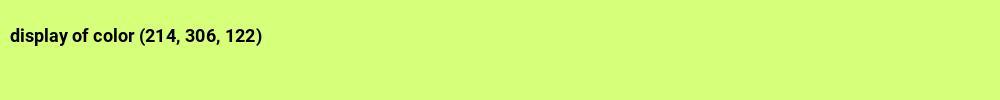

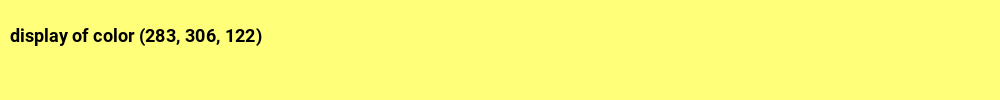

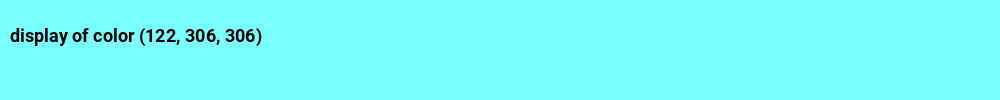

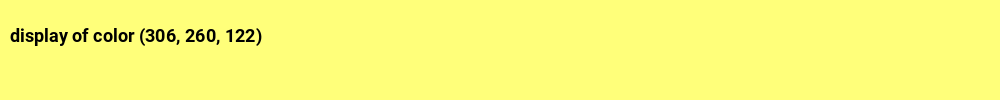

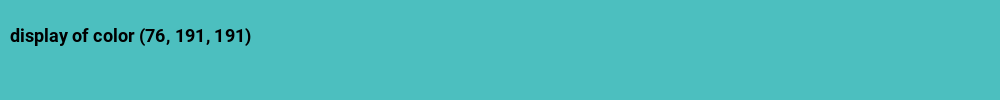

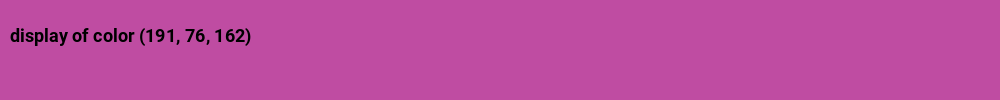

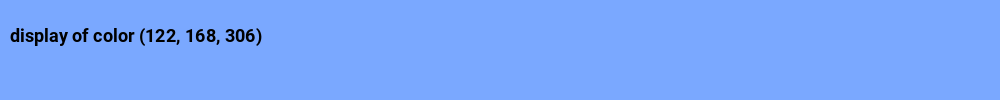

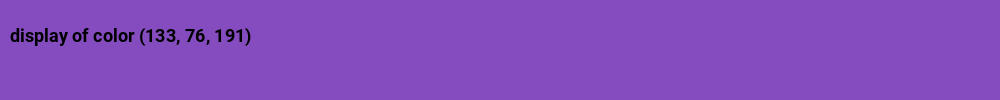

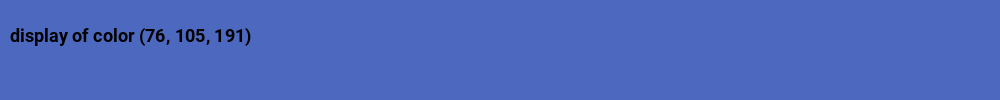

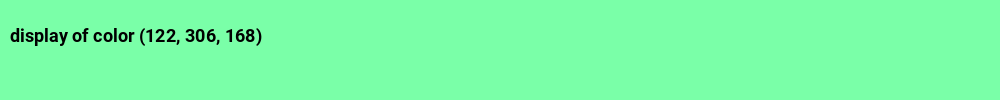

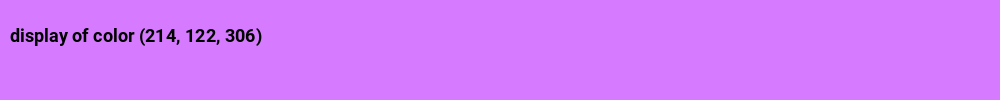

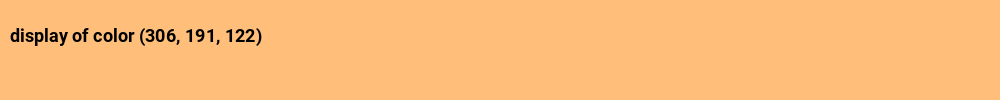

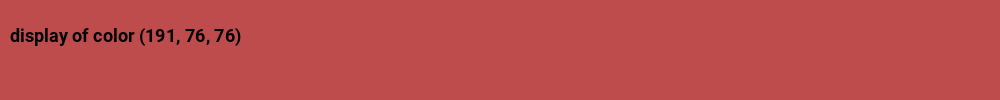

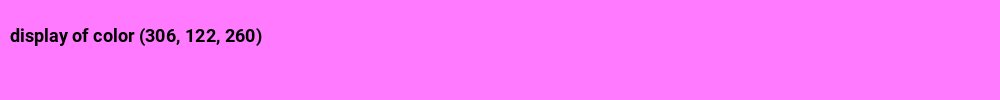

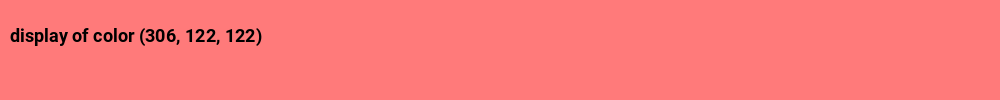

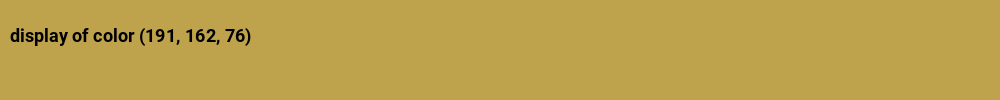

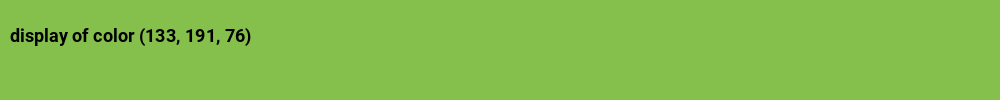

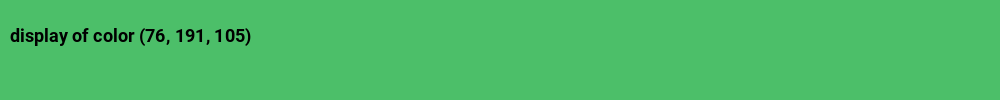

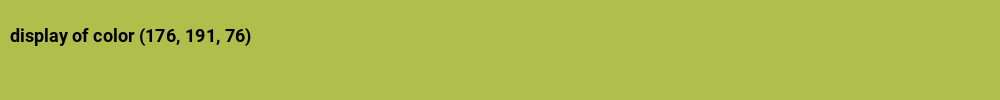

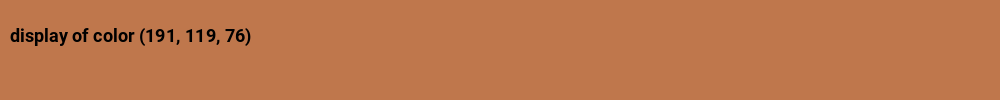

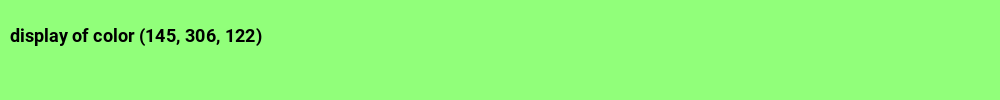

In [4]:
display_colors(segmentation)

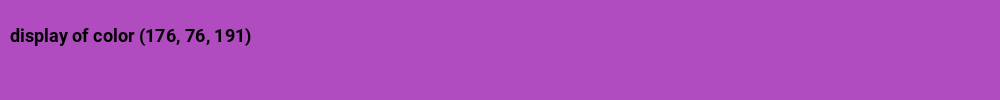

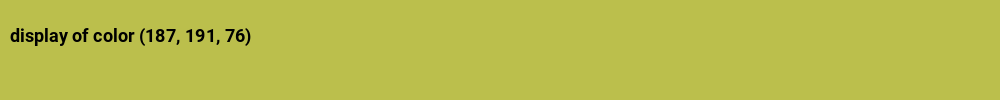

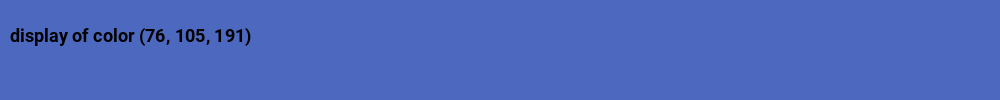

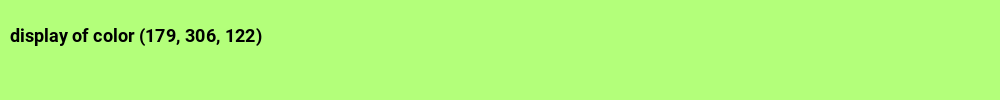

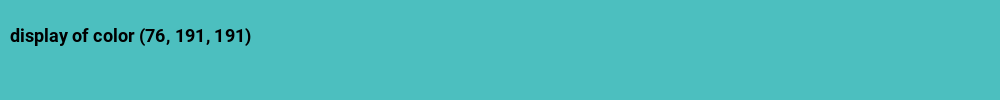

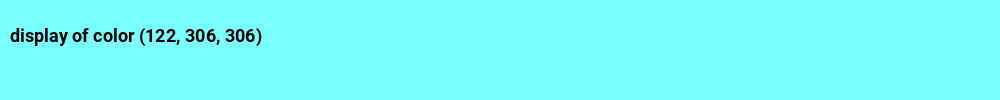

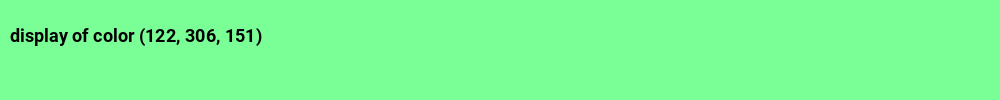

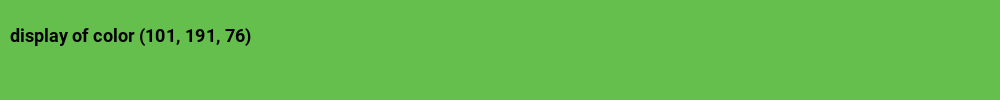

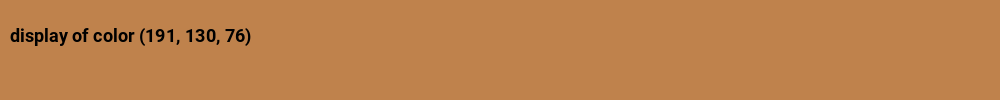

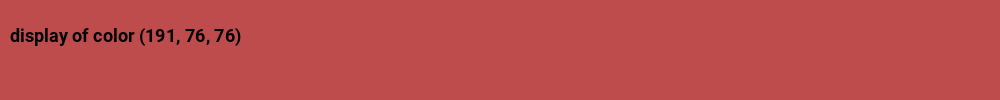

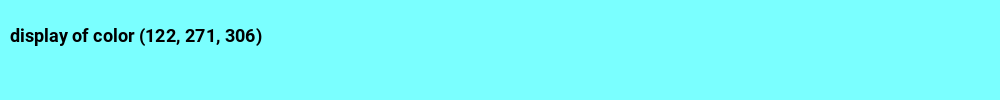

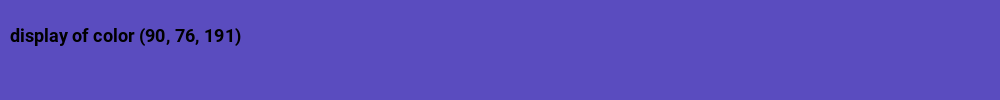

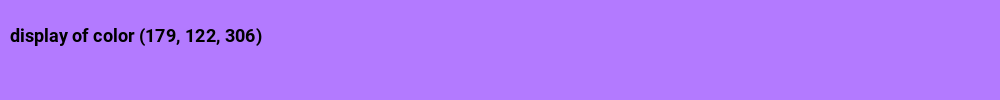

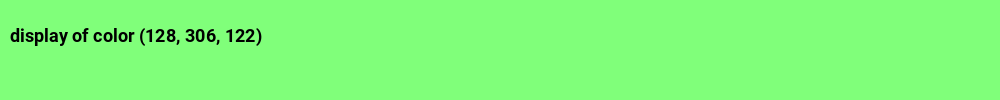

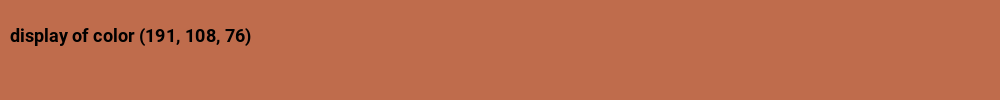

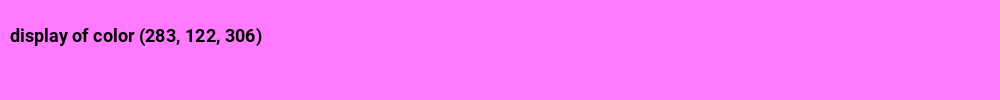

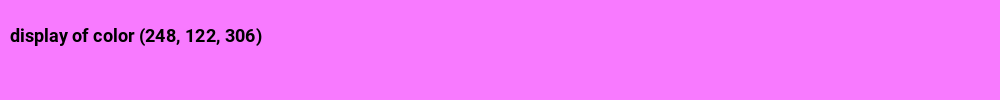

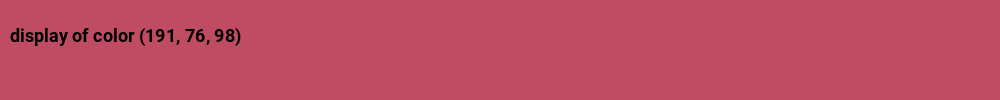

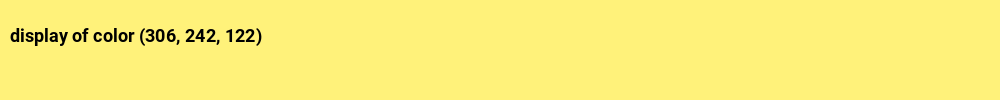

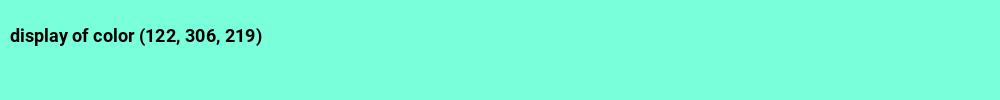

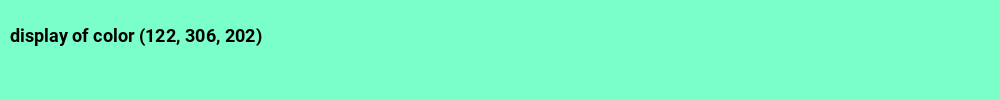

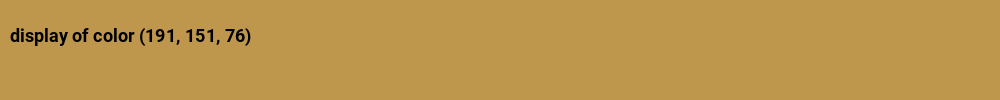

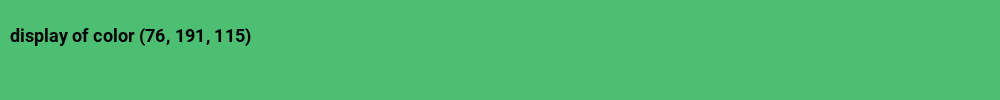

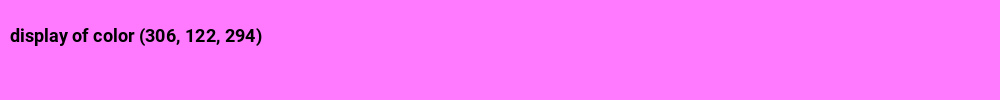

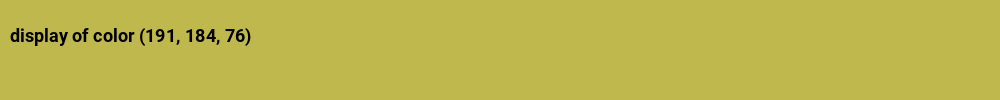

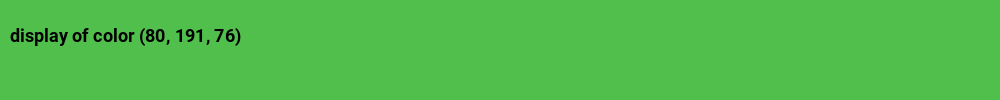

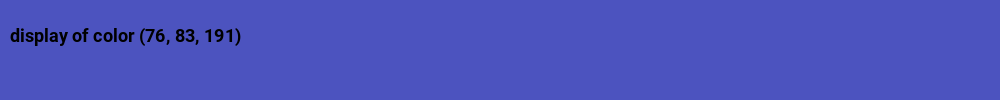

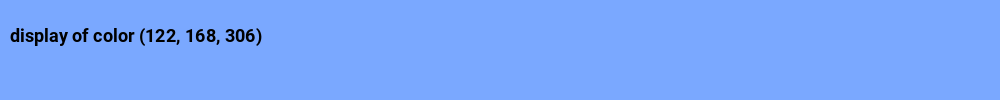

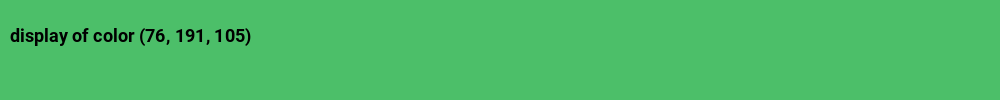

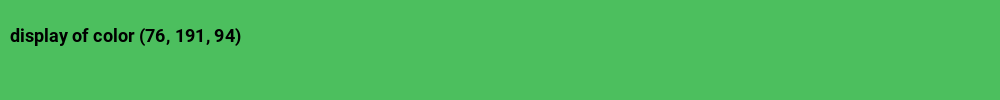

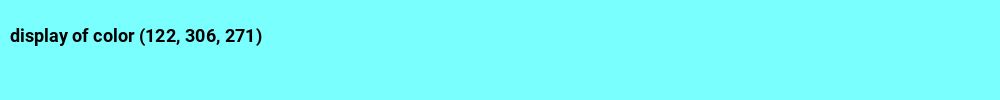

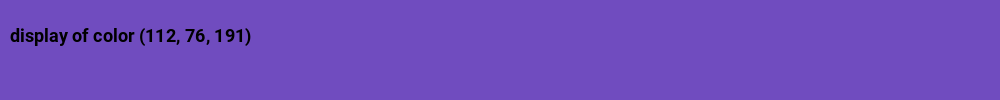

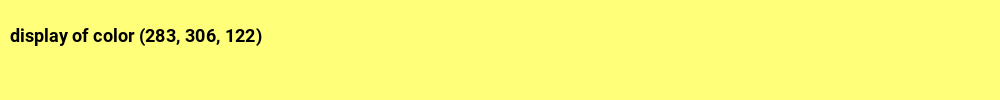

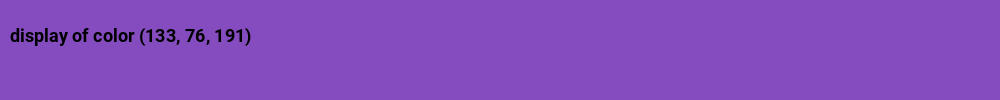

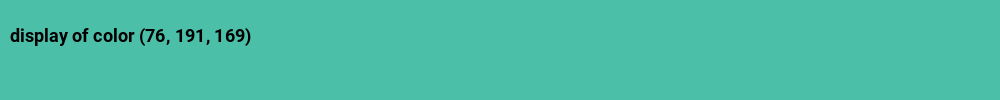

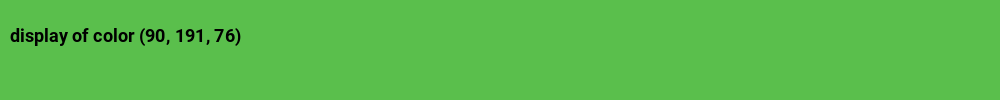

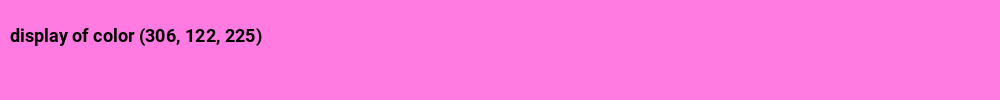

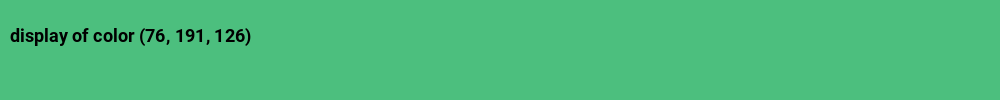

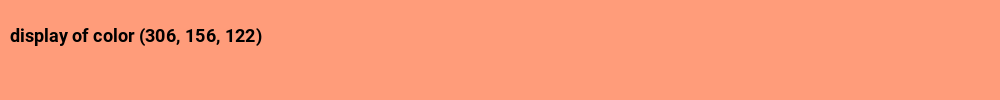

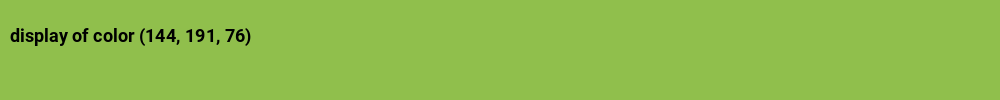

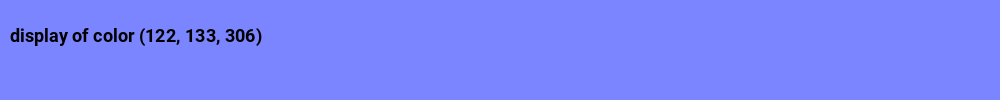

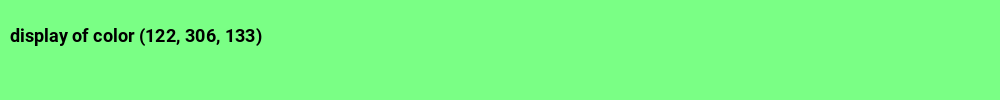

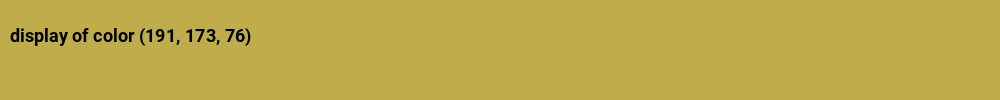

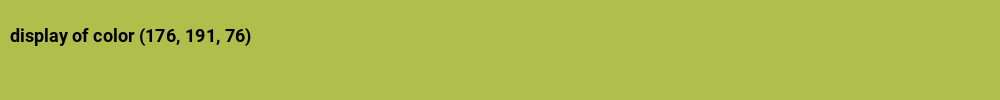

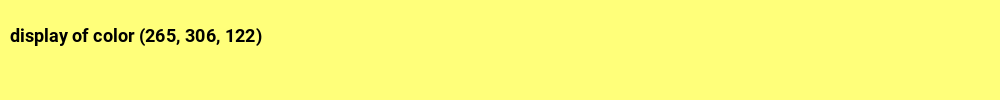

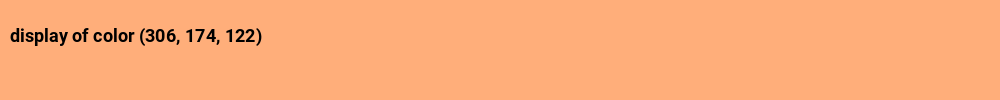

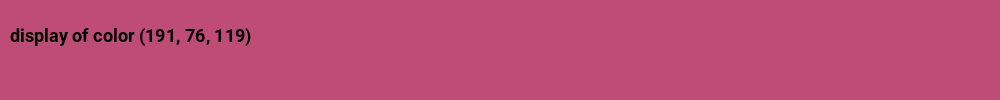

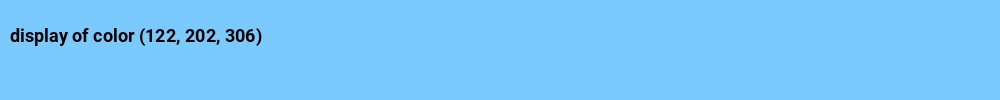

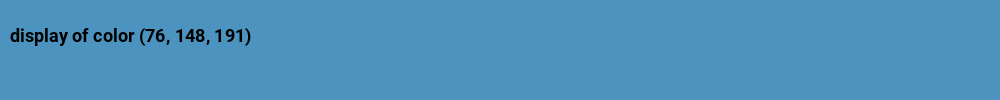

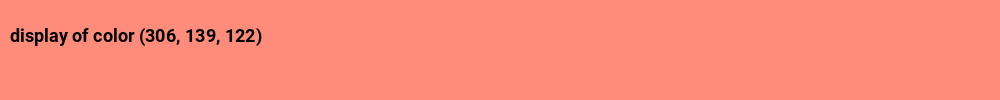

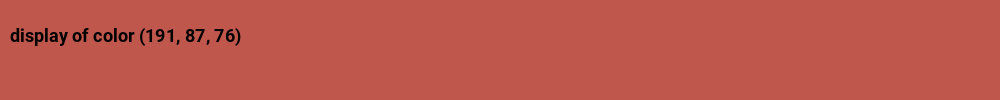

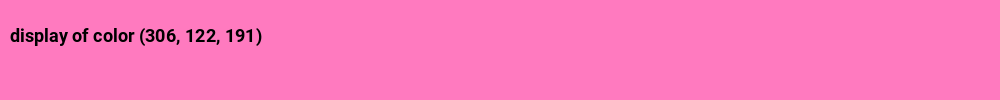

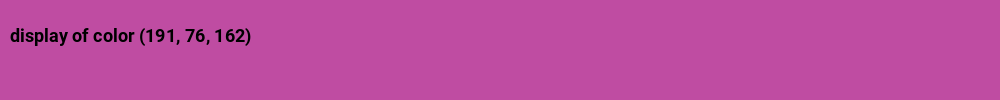

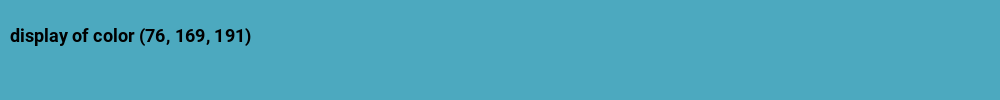

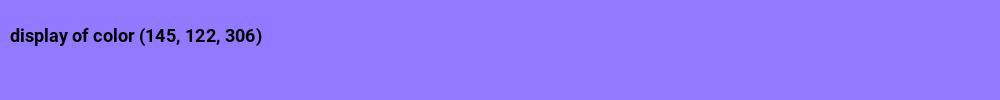

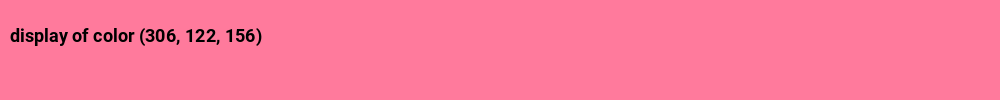

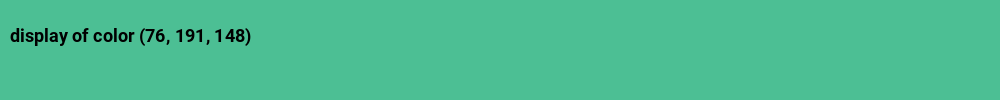

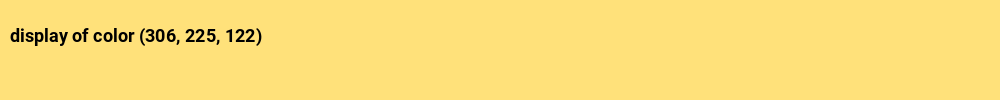

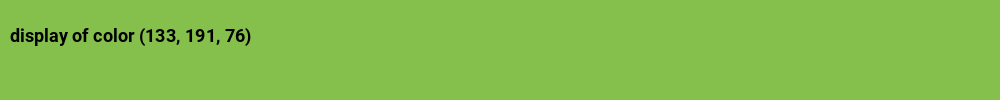

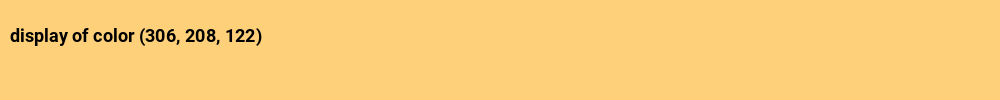

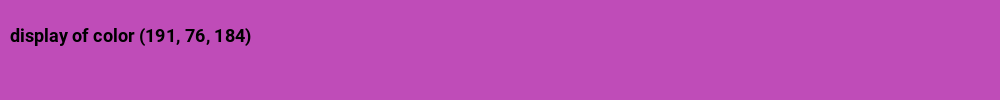

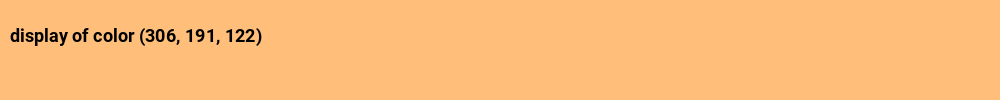

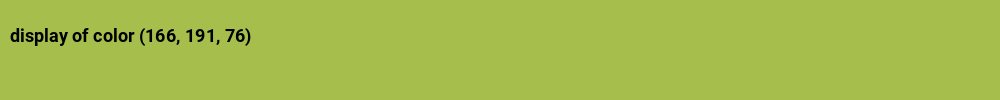

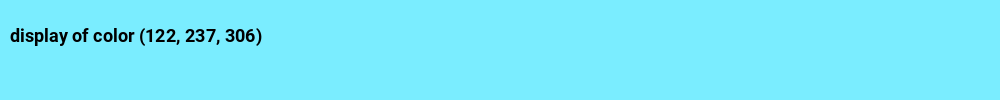

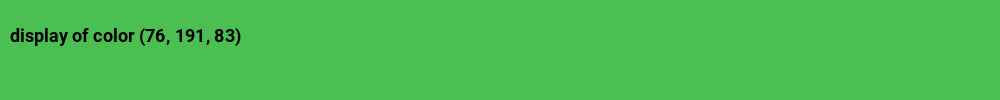

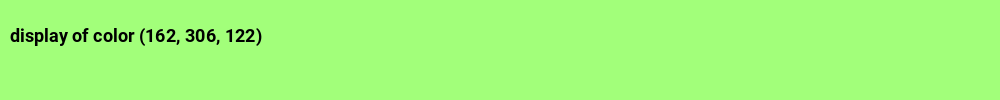

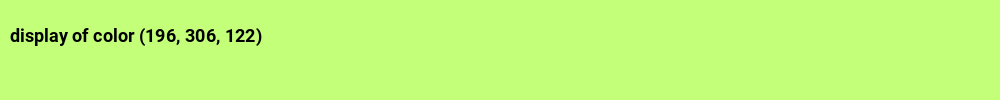

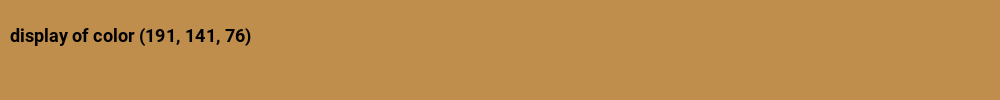

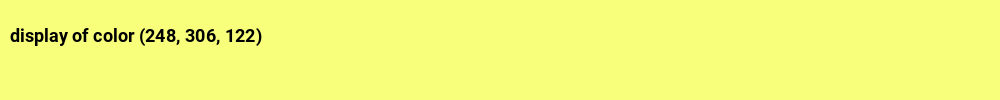

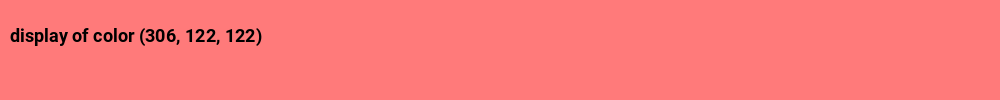

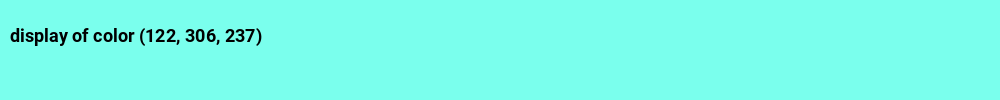

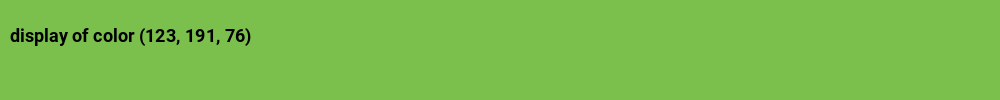

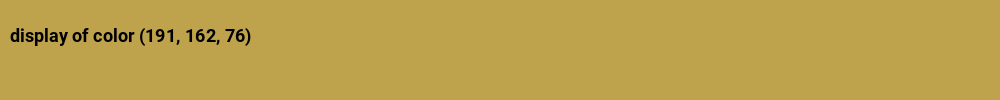

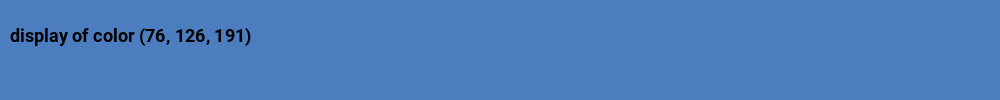

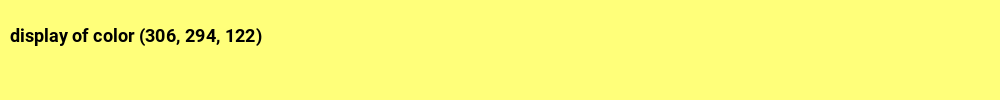

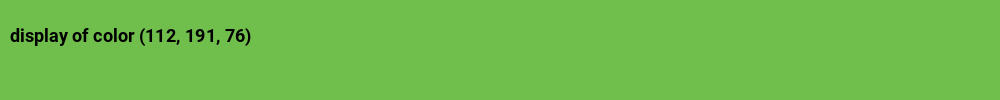

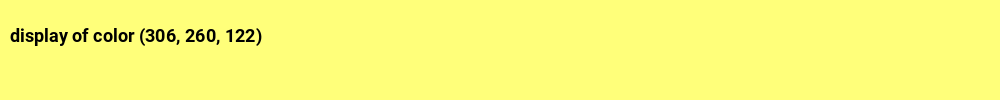

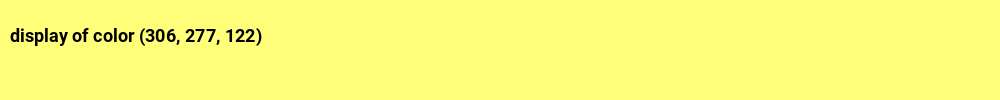

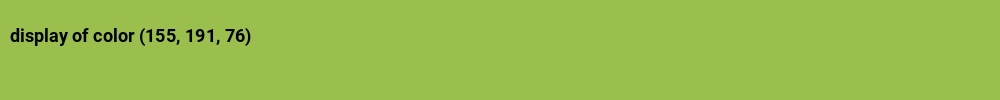

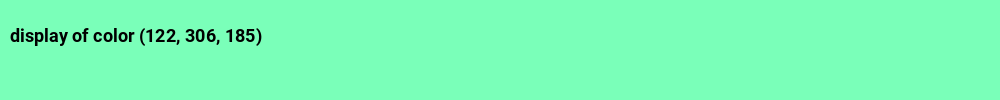

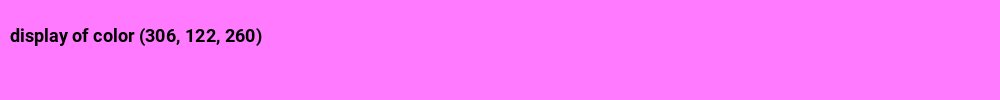

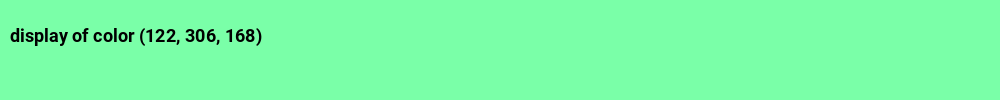

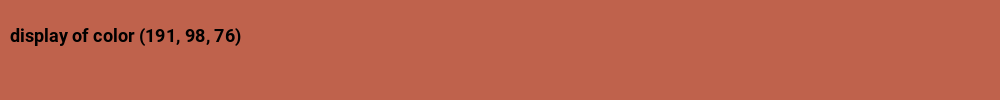

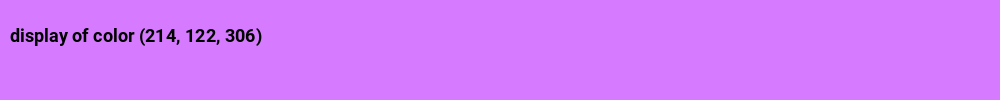

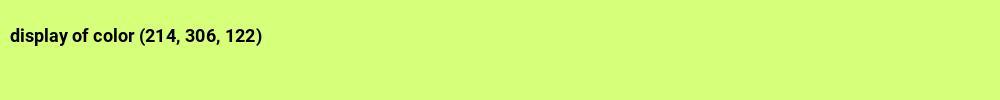

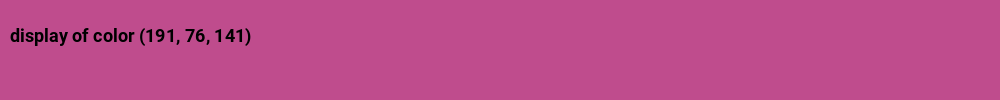

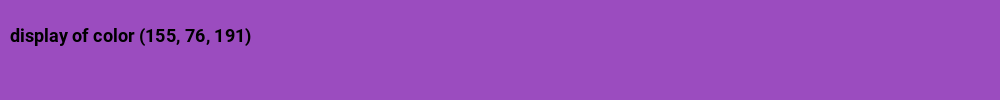

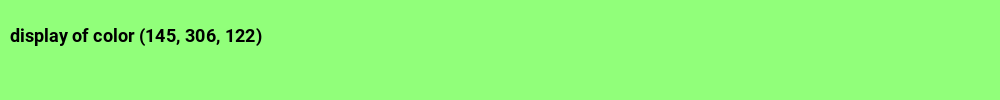

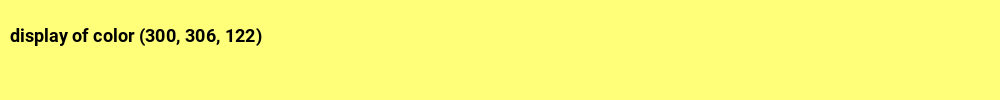

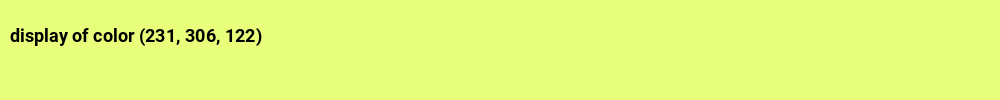

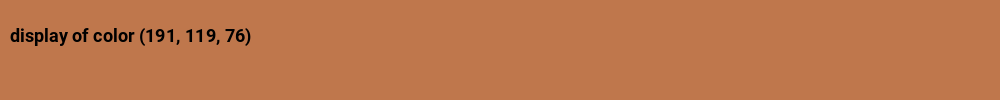

In [5]:
display_colors(object_detection)

In [6]:
COCO_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [7]:
len(COCO_CATEGORY_NAMES)

91

In [8]:
len([c for c in COCO_CATEGORY_NAMES if c != 'N/A' and c != '__background__'])

80

In [9]:
[(155,155,155)] + segmentation[:len(segmentation) - 1]

[(155, 155, 155),
 (214, 306, 122),
 (283, 306, 122),
 (122, 306, 306),
 (306, 260, 122),
 (76, 191, 191),
 (191, 76, 162),
 (122, 168, 306),
 (133, 76, 191),
 (76, 105, 191),
 (122, 306, 168),
 (214, 122, 306),
 (306, 191, 122),
 (191, 76, 76),
 (306, 122, 260),
 (306, 122, 122),
 (191, 162, 76),
 (133, 191, 76),
 (76, 191, 105),
 (176, 191, 76),
 (191, 119, 76)]

In [10]:
object_detection

[(176, 76, 191),
 (187, 191, 76),
 (76, 105, 191),
 (179, 306, 122),
 (76, 191, 191),
 (122, 306, 306),
 (122, 306, 151),
 (101, 191, 76),
 (191, 130, 76),
 (191, 76, 76),
 (122, 271, 306),
 (90, 76, 191),
 (179, 122, 306),
 (128, 306, 122),
 (191, 108, 76),
 (283, 122, 306),
 (248, 122, 306),
 (191, 76, 98),
 (306, 242, 122),
 (122, 306, 219),
 (122, 306, 202),
 (191, 151, 76),
 (76, 191, 115),
 (306, 122, 294),
 (191, 184, 76),
 (80, 191, 76),
 (76, 83, 191),
 (122, 168, 306),
 (76, 191, 105),
 (76, 191, 94),
 (122, 306, 271),
 (112, 76, 191),
 (283, 306, 122),
 (133, 76, 191),
 (76, 191, 169),
 (90, 191, 76),
 (306, 122, 225),
 (76, 191, 126),
 (306, 156, 122),
 (144, 191, 76),
 (122, 133, 306),
 (122, 306, 133),
 (191, 173, 76),
 (176, 191, 76),
 (265, 306, 122),
 (306, 174, 122),
 (191, 76, 119),
 (122, 202, 306),
 (76, 148, 191),
 (306, 139, 122),
 (191, 87, 76),
 (306, 122, 191),
 (191, 76, 162),
 (76, 169, 191),
 (145, 122, 306),
 (306, 122, 156),
 (76, 191, 148),
 (306, 225, 1

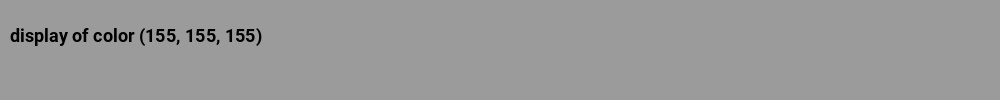

In [11]:
display_colors([(155,155,155)])

In [12]:
PASCAL_VOC_CLASSES = ['arrière-plan','avion','byciclette','oiseau','bateau','bouteille','bus','voiture','chat','chaise','vache','table à manger','chien','cheval','moto','humain','plante','mouton','canapé','train','tv']

In [13]:
len(PASCAL_VOC_CLASSES)

21